In [1]:
import numpy as np 
import pandas as pd 

In [2]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train_df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_df.sample(5)

,id,keyword,location,text
1405,4636,emergency%20services,"Anchorage, AK",We're #hiring! Click to apply: Registered Nurs...
72,234,airplane%20accident,NaN,Experts in France begin examining airplane deb...
205,668,attack,Worldwide,Cooper the Super Pooper. The hero dog who save...
1755,5931,harm,"HamptonRoads, Virginia",Father we come 2u &amp; lift up this nation Am...
33,108,accident,Massachusetts,Coincidence Or #Curse? Still #Unresolved Secre...


In [5]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
train_df.shape

(7613, 5)

In [7]:
train_df.dropna(subset=['keyword'], inplace=True)

In [8]:
train_df = train_df.fillna("None")
train_df.shape

(7552, 5)

In [9]:
location_count = train_df["location"].value_counts()
location_df = pd.DataFrame({'location': location_count.index, 'count': location_count.values})
location_df.to_csv('location_counts.csv', index=False)

#### **Location Column has too many unique values It is not good to use as training parameter we have to replace values as "Other"**

In [10]:
#Hande locations
replace_values = location_count[location_count < 10].index.tolist()
train_df["location"] = train_df["location"].map(lambda x: "Unspecified" if x in replace_values else x)
train_df["location"].value_counts()

Unspecified          4265
None                 2472
USA                   104
New York               71
United States          50
London                 45
Canada                 29
Nigeria                28
UK                     27
Los Angeles, CA        26
India                  24
Mumbai                 22
Washington, DC         21
Kenya                  20
Worldwide              19
Australia              18
Chicago, IL            18
California             17
California, USA        15
New York, NY           15
Everywhere             15
Florida                14
United Kingdom         14
San Francisco          14
Indonesia              13
Washington, D.C.       13
Los Angeles            13
NYC                    12
Ireland                12
Toronto                12
Chicago                11
San Francisco, CA      11
Seattle                11
Earth                  11
Sacramento, CA         10
New York City          10
Atlanta, GA            10
Texas                  10
ss          

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df["location"] = le.fit_transform(train_df["location"])
train_df["keyword"] = le.fit_transform(train_df["keyword"])

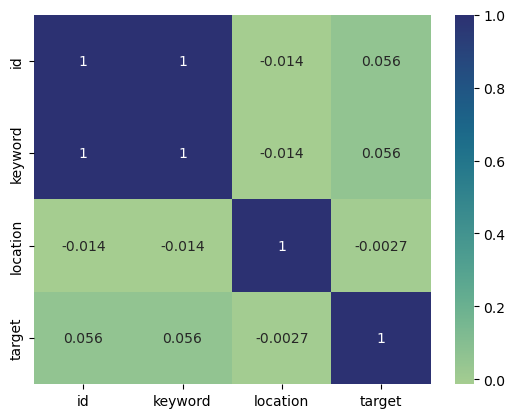

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.show()

In [13]:
train_df.head()

,id,keyword,location,text,target
31,48,0,36,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,0,36,We always try to bring the heavy. #metal #RT h...,0
33,50,0,36,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,0,36,Crying out for more! Set me ablaze,0
35,53,0,16,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


### **TEXT ENCODING**

In [14]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [15]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [16]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [17]:
def batch_generator(sentences, batch_size):
    for i in range(0, len(sentences), batch_size):
        yield sentences[i:i+batch_size]

batch_size = 100
embeddings = []
i = 0

for batch in batch_generator(train_df["text"], batch_size):
    print(i)
    embeddings.append(get_sentence_embeding(batch))
    i = i + 1
    
embededtext = tf.concat(embeddings, axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


In [18]:
embededtext = embededtext.numpy()

In [19]:
X = train_df.drop(["target","id","text"], axis=1)
Y = train_df["target"]

In [20]:
train_df_E = np.concatenate((X,embededtext), axis=1)
train_df_E.shape

(7552, 770)

In [21]:
train_df_E.shape

(7552, 770)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_df_E,Y,train_size=0.9)
X_train.shape

(6796, 770)

In [23]:
X_train

array([[ 35.        ,  36.        ,  -0.78861481, ...,  -0.48926008,
         -0.75258172,   0.78714895],
       [163.        ,   1.        ,  -0.81626123, ...,  -0.64289606,
         -0.78593236,   0.86420107],
       [141.        ,  25.        ,  -0.74323684, ...,  -0.30554906,
         -0.54328185,   0.75892568],
       ...,
       [200.        ,  36.        ,  -0.45542535, ...,  -0.58025855,
         -0.52850646,   0.60503256],
       [ 90.        ,  25.        ,  -0.82769966, ...,  -0.76223606,
         -0.58483088,   0.94055969],
       [ 82.        ,  36.        ,  -0.85490608, ...,  -0.8317669 ,
         -0.76844299,   0.75610131]])

In [24]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)

SVC(kernel='linear')

In [25]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [26]:
accuracy = clf.score(X_test, Y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


Text(0.5, 1.0, 'Receiver Operating Character')

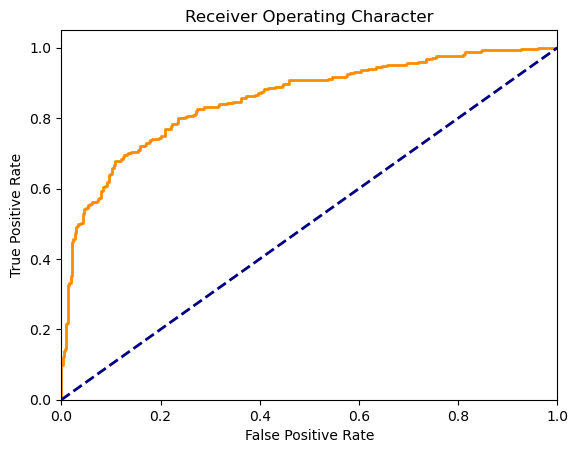

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = clf.decision_function(X_test)

y_prob = 1 / (1 + np.exp(-y_score))

# Generate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Character')